# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from pylab import *

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

In [4]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100,)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [5]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+math.exp(-z))

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [56]:

def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    jt=0
    for i in range(len(X)):
        j=0
        for k in range(X.shape[1]):
            j=j+theta[k][0]*X[i,k]
#             print(j)
        j=y[i]*math.log(Sigmoid(j))+(1-y[i])*math.log(1-Sigmoid(j))
        jt=jt+j
    jt=(-jt)/((len(X)))
    return jt
print(computeCost(X, y, theta))
  

0.6931471805599458


In [57]:
def computeCostAvecVectorisation(X, y, theta):
    z=X@theta
    m=len(z)
    cout=0
    add=0
    for i in range(m):
        add=add+y[i]*math.log(Sigmoid(z[i,0]))+(1-y[i])*math.log(1-Sigmoid(z[i,0]))                   
    cout=(-1/m)*add
    return cout
computeCost(X, y, theta)

0.693147180559946

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [48]:
all_t0=[]
all_t1=[]
all_t2=[]
all_costs=[]
def j(theta,X,y):
    theta_new=[]
    for l in range(X.shape[1]):
        j=0
        for i in range(len(X)):
            t=0
            for k in range(X.shape[1]):
                t=t+theta[k][0]*X[i,k]
            t=Sigmoid(t)
            t=t-y[i]
            j=j+t*X[i,l]
        j=j/len(X)
        theta_new.append(j)
    return theta_new
# theta=j(theta,X,y)
print(theta)
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    # GDMV
    i=0
    while(i<iterations):
        jd=[]
        jd=j(theta,X,y)
#         if((np.isneginf(jd).any())|(np.isinf(jd).any())):
#             break
        for k in range(len(jd)):
            theta[k][0]=theta[k][0]-alpha*jd[k]
            if k==0:
                all_t0.append(theta[k][0])
            if k==1:
                all_t1.append(theta[k][0])
            if k==2:
                all_t2.append(theta[k][0])
#             print(computeCost(X, y, theta))
        all_costs.append(computeCost(X, y, theta))
        i=i+1
    print(theta)
start = time.time()
gradientDescent(X, y, theta, alpha, iterations)
end = time.time()
print(end - start)
    

[[0.]
 [0.]
 [0.]]
[[-6.26886171]
 [ 0.2818767 ]
 [ 0.24829766]]
20.475990772247314


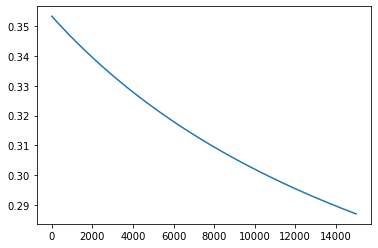

In [18]:
plt.plot(all_costs)

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [54]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [82]:
initialCost=computeCost(X, y, theta)

Appel des la fonction de calcul du gradient

In [55]:
# paramètres
iterations = 15000;
alpha = 0.01;
# Appel
# theta = gradientDescent(X, y, theta, alpha, iterations);

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [19]:
def drawLine(theta,X):
    print(theta)
    tab_x2=[]
    tab_x1=[]
    for i in range(len(X)):
        tab_x1.append(X[i,1])
        y=(-theta[0][0]-(theta[1][0]*X[i,1]))/theta[2][0]
        tab_x2.append(y)
    plt.plot(tab_x1,tab_x2)

# Affichage 
Graphe representant les acceptations selon les caracteristiques

[[-6.26886171]
 [ 0.2818767 ]
 [ 0.24829766]]


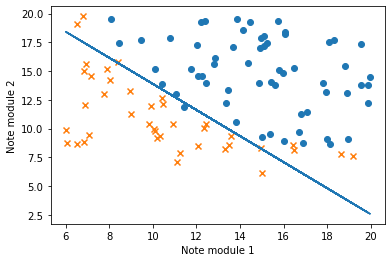

In [49]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
drawLine(theta,X)

Traçage du coût en fonction de theta0 et theta1

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_14240/2358853275.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


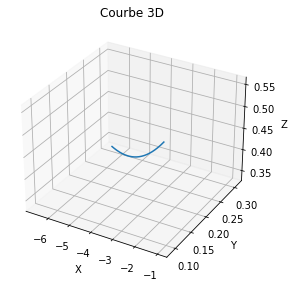

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.plot(all_t0, all_t1, all_costs, label='Courbe')  # Tracé de la courbe 3D
plt.title("Courbe 3D")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.show()

In [168]:
# print(all_t0)
print(len(all_t0))
print(len(all_t1))
print(len(all_costs))
# print(all_t1)
# print(all_costs)

15000
15000
15000


Prédire des valeurs de y

In [189]:
# Predire pour des notes note1= 9 et note2=17
predict1 = Sigmoid(np.matmul([1, 9, 17],theta));
predict1

0.7192509078882918

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

[[0.94159608 0.91667148]]
[[-22.93181743]
 [  0.94159608]
 [  0.91667148]]


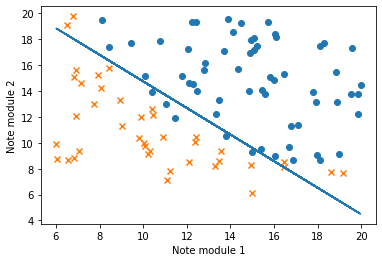

In [50]:
import numpy as np
from sklearn.linear_model import LogisticRegression
t=[]
reg = LogisticRegression(solver='lbfgs',max_iter=15000).fit(X[:,1:], y) #Fitting the model given your X and y values.
print(reg.coef_)

t=reg.coef_

theta[0][0]=reg.intercept_
theta[1][0]=t[0][0]
theta[2][0]=t[0][1]

# print(theta)

plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
drawLine(theta,X)

In [35]:
len(reg.coef_)

1

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [ ]:
# bonne chance